<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2024notebooks/2024_1011Python_Numpy_Primers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import numpy as np

# Pytorch と numpy

In [2]:
# numpy
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [3]:
# torch
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [4]:
# numpy
X = np.random.random((5, 3))
X

array([[0.43678235, 0.06640024, 0.72872376],
       [0.60929526, 0.07712217, 0.4025226 ],
       [0.10687209, 0.12460636, 0.59612628],
       [0.11429733, 0.10895829, 0.80561827],
       [0.39453936, 0.40646379, 0.84926129]])

In [5]:
# pytorch
Y = torch.rand((5, 3))
Y

tensor([[0.5277, 0.2621, 0.3405],
        [0.1856, 0.5568, 0.6343],
        [0.9628, 0.7415, 0.1120],
        [0.9686, 0.9366, 0.9689],
        [0.3423, 0.3058, 0.8134]])

In [6]:
print(X.shape, Y.shape)

(5, 3) torch.Size([5, 3])


In [7]:
# numpy
X.T @ X

array([[0.74216636, 0.26212917, 1.05440507],
       [0.26212917, 0.20296829, 0.58668473],
       [1.05440507, 0.58668473, 2.41869484]])

In [8]:
# torch
Y.t() @ Y

tensor([[2.2954, 1.9675, 1.6222],
        [1.9675, 1.8993, 1.6817],
        [1.6222, 1.6817, 2.1312]])

In [9]:
from numpy.linalg import inv
# numpy
inv(X.T @ X)

array([[ 3.54810702, -0.37258975, -1.45638435],
       [-0.37258975, 16.52430279, -3.84574995],
       [-1.45638435, -3.84574995,  1.98117667]])

In [10]:
# torch
torch.inverse(Y.t() @ Y)

tensor([[ 4.2583, -5.1154,  0.7953],
        [-5.1154,  7.8926, -2.3343],
        [ 0.7953, -2.3343,  1.7058]])

# 相互変換

In [11]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [12]:
# torch --> numpy
B = A.numpy()
B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [13]:
A.add_(.5)
A

tensor([[1.5000, 0.5000, 0.5000],
        [0.5000, 1.5000, 0.5000],
        [0.5000, 0.5000, 1.5000]])

torch の tensor である A に対して 0.5 を加えて結果，numpy の array である B も影響を受ける

In [14]:
B

array([[1.5, 0.5, 0.5],
       [0.5, 1.5, 0.5],
       [0.5, 0.5, 1.5]], dtype=float32)

In [15]:
# numpy --> torch
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

In [16]:
print([o for o  in dir(torch) if not o.startswith("_")][:30])

['AVG', 'AggregationType', 'AliasDb', 'Any', 'AnyType', 'Argument', 'ArgumentSpec', 'AwaitType', 'BFloat16Storage', 'BFloat16Tensor', 'BenchmarkConfig', 'BenchmarkExecutionStats', 'Block', 'BoolStorage', 'BoolTensor', 'BoolType', 'BufferDict', 'ByteStorage', 'ByteTensor', 'CallStack', 'Callable', 'Capsule', 'CharStorage', 'CharTensor', 'ClassType', 'Code', 'CompilationUnit', 'CompleteArgumentSpec', 'ComplexDoubleStorage', 'ComplexFloatStorage']


In [17]:
print([o for o  in dir(A) if not o.startswith("_")][:30])

['H', 'T', 'abs', 'abs_', 'absolute', 'absolute_', 'acos', 'acos_', 'acosh', 'acosh_', 'add', 'add_', 'addbmm', 'addbmm_', 'addcdiv', 'addcdiv_', 'addcmul', 'addcmul_', 'addmm', 'addmm_', 'addmv', 'addmv_', 'addr', 'addr_', 'adjoint', 'align_as', 'align_to', 'all', 'allclose', 'amax']


# GPU の使用

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
device


device(type='cpu')

任意のデータを GPU に転送するためには `.to(device)` とする。

In [19]:
data = torch.eye(3)
data = data.to(device)

In [20]:
res = data + data
res

tensor([[2., 0., 0.],
        [0., 2., 0.],
        [0., 0., 2.]])

In [21]:
res.device

device(type='cpu')

# 自動微分 `autograd`

バージョン v0.4 以前の PyTorch では，クラス変数 `Variable` を使用して勾配を記録していた。
このため，テンソルを必ず変数でラップする必要があった。

バージョン 0.4 では，例えば `torch.ones(3, requires_grad=True)` のように，テンソルに勾配を直接保持するように指示すれば，テンソルが直接勾配を記録される。
したがって `Variable` を使用する必要はなくなった。
だが，公刊されている Pytoch のコードの中には，以前として `Variable` を使用している場合がある。

<https://pytorch.org/docs/stable/autograd.html>
<https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html>

`torch.autograd` を直接使用することはほとんどない。
ほとんどすべてが `torch.Tensor` の一部となっている。
勾配を計算したいテンソルに `requires_grad=True` を追加するだけで `nn.Module` が勾配を自動的に追跡する。

In [22]:
from torch import autograd

In [23]:
x = torch.tensor(2.)
x

tensor(2.)

In [24]:
x = torch.tensor(2., requires_grad=True)
x


tensor(2., requires_grad=True)

In [25]:
print(x.requires_grad)

True


In [26]:
print(x.grad)

None


In [27]:
y = x ** 2
print("Grad of x:", x.grad)
#print("Grad of y:", y.grad)


Grad of x: None


In [28]:
y = x ** 2
y.backward()

print("Grad of x:", x.grad)


Grad of x: tensor(4.)


In [29]:
# What is going to happen here?
x = torch.tensor(2.)
x.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [30]:
# Don't record the gradient
# Useful for inference

x = torch.tensor(2., requires_grad=True)

with torch.no_grad():
    y = x * x
    print(x.grad_fn)


None


In [31]:
lin = nn.Linear(2, 1, bias=True)
lin.weight

Parameter containing:
tensor([[-0.0929,  0.5737]], requires_grad=True)

In [32]:
type(lin.weight)

torch.nn.parameter.Parameter

In [33]:
isinstance(lin.weight, torch.FloatTensor)

True

# Dataset

データセットを自作するのは容易である。
だが，PyTorch にはいくつかの組み込みデータセットが付属している。
以下参照:

* MNIST
* Fashion-MNIST
* KMNIST
* EMNIST
* FakeData
* COCO
    * Captions
    * Detection
* LSUN
* ImageFolder
* DatasetFolder
* Imagenet-12
* CIFAR
* STL10
* SVHN
* PhotoTour
* SBU
* Flickr
* VOC
* Cityscapes

Dataset はサンプル数に関する情報 (`__len__`) と，指定したインデックスのサンプル (`__getitem__`) を作成する必要がある。
データ操作のための簡易な抽象化とみなしうる。

In [34]:
from torch.utils.data import Dataset

```python
class Dataset(object):
    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])
```

`ImageFolder` データセットは非常に有用であり，フォルダレイアウトの一般的な慣例に従っている。

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

In [35]:
import os
import tarfile
import zipfile

from torchvision.datasets.folder import ImageFolder, default_loader
from torchvision.datasets.utils import download_url, check_integrity

class DogsCatsDataset(ImageFolder):
    """
    The 'Dogs and Cats' dataset from kaggle.

    https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/

    Args:
        root: the location where to store the dataset
        suffix: path to the train/valid/sample dataset. See folder structure.
        transform (callable, optional): A function/transform that takes in
            an PIL image and returns a transformed version.
            E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that
            takes in the target and transforms it.
        loader: A function to load an image given its path.
        download: if ``True``, download the data.


    The folder structure of the dataset is as follows::

        └── dogscats
            ├── sample
            │   ├── train
            │   │   ├── cats
            │   │   └── dogs
            │   └── valid
            │       ├── cats
            │       └── dogs
            ├── train
            │   ├── cats
            │   └── dogs
            └── valid
                ├── cats
                └── dogs

    """

    #url = "http://files.fast.ai/data/dogscats.zip"
    url = "https://files.fast.ai/data/examples/dogscats.tgz"
    #url = "https://files.fast.ai/data/examples/mnist_tiny.tgz"
    #filename = "dogscats.zip"
    filename = 'dogscats.tgz'
    #filename = 'mnist_tiny.tgz'
    checksum = "aef22ec7d472dd60e8ee79eecc19f131"

    def __init__(
        self,
        root: str,
        suffix: str,
        transform=None,
        target_transform=None,
        loader=default_loader,
        download=False,
    ):
        self.root = os.path.expanduser(root)

        if download:
            self._download()
            self._extract()

        if not self._check_integrity():
            raise RuntimeError(
                "Dataset not found or corrupted. "
                "You can use download=True to download it"
            )

        #path = os.path.join(self.root, "mnist_tiny", suffix)
        path = os.path.join(self.root, "dogscats", suffix)
        print(f"Loading data from {path}.")
        assert os.path.isdir(path), f"'{suffix}' is not valid."

        super().__init__(path, transform, target_transform, loader)

    def _download(self):
        if self._check_integrity():
            print("Dataset already downloaded and verified.")
            return

        root = self.root
        print("Downloading dataset... (this might take a while)")
        download_url(self.url, root, self.filename) # , self.checksum)
        #download_url(self.url, root, self.filename, self.checksum)

    def _extract(self):
        path_to_zip = os.path.join(self.root, self.filename)
        # with zipfile.ZipFile(path_to_zip, "r") as zip_ref:
        #     zip_ref.extractall(self.root)
        file = tarfile.open(path_to_zip)
        file.extractall(self.root)

    def _check_integrity(self):
        #path_to_zip = os.path.join(self.root, self.filename)
        #return check_integrity(path_to_zip, self.checksum)
        return True

In [44]:
!mkdir data
!mkdir data/raw
!wget "https://files.fast.ai/data/examples/dogscats.tgz" -O data/raw/dogscats.tgz

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/raw’: File exists
--2024-10-11 00:53:28--  https://files.fast.ai/data/examples/dogscats.tgz
Resolving files.fast.ai (files.fast.ai)... 104.26.2.19, 104.26.3.19, 172.67.69.159, ...
Connecting to files.fast.ai (files.fast.ai)|104.26.2.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 839285364 (800M) [application/x-gtar-compressed]
Saving to: ‘data/raw/dogscats.tgs’

data/raw/dogscats.t 100%[===================>] 800.40M   125MB/s    in 9.6s    

2024-10-11 00:53:38 (83.7 MB/s) - ‘data/raw/dogscats.tgs’ saved [839285364/839285364]



In [48]:
train_ds = DogsCatsDataset(root="./data/raw", suffix="sample/train", download=True)


Dataset already downloaded and verified.
Loading data from ./data/raw/dogscats/sample/train.


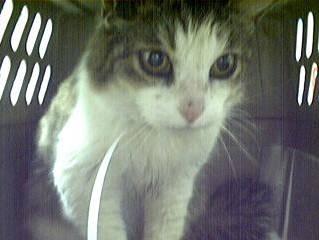

In [49]:
X, y = train_ds.__getitem__(2)
X

In [51]:
train_ds

Dataset DogsCatsDataset
    Number of datapoints: 16
    Root location: ./data/raw/dogscats/sample/train

In [52]:
# the __len__ method
len(train_ds)

16

In [53]:
# the __getitem__ method
train_ds[0]


(<PIL.Image.Image image mode=RGB size=499x375>, 0)

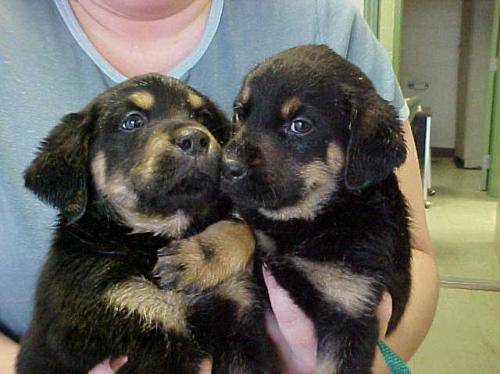

In [54]:
train_ds[14][0]

# torchvision.transforms

In [57]:
from torchvision import transforms

In [58]:
_image_size = 224
_mean = [0.485, 0.456, 0.406]
_std = [0.229, 0.224, 0.225]


trans = transforms.Compose([
    transforms.RandomCrop(_image_size),
    # transforms.RandomHorizontalFlip(),
    # transforms.ColorJitter(.3, .3, .3),
    transforms.ToTensor(),
    transforms.Normalize(_mean, _std),
])

trans(train_ds[13][0])

tensor([[[ 1.6153,  1.3070,  0.8789,  ...,  2.2489,  2.2489,  2.2489],
         [ 1.0673,  0.3138, -0.5253,  ...,  2.2489,  2.2489,  2.2489],
         [ 0.2624, -0.4226, -1.1418,  ...,  2.2489,  2.2489,  2.2489],
         ...,
         [ 0.8961,  0.8618,  0.8618,  ...,  1.3584,  1.3413,  1.1872],
         [ 0.8961,  0.8789,  0.8789,  ...,  1.2385,  1.2728,  1.3070],
         [ 0.9132,  0.8961,  0.8961,  ...,  1.2043,  1.2043,  1.2728]],

        [[ 1.7633,  1.4482,  1.0105,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.2031,  0.4328, -0.4251,  ...,  2.4286,  2.4286,  2.4286],
         [ 0.3803, -0.3200, -1.0553,  ...,  2.4286,  2.4286,  2.4286],
         ...,
         [ 1.0455,  1.0280,  1.0280,  ...,  1.6758,  1.6583,  1.5007],
         [ 1.0455,  1.0455,  1.0455,  ...,  1.5707,  1.6057,  1.6408],
         [ 1.0630,  1.0630,  1.0630,  ...,  1.5357,  1.5357,  1.6057]],

        [[ 1.4548,  1.1237,  0.6879,  ...,  2.6400,  2.6400,  2.6400],
         [ 0.8971,  0.1128, -0.7413,  ...,  2

# torchvision.transforms.functional

Functional transforms は，transform のパイプラインをきめ細かく制御できる。
上記の transform とは異なり，transform にはパラメータ用の乱数発生器は含まれていない。
つまり、すべてのパラメータを指定または生成する必要があるが functional transforomo は再利用できる。
例えば，次のように複数の画像に機能変換を適用できる。
<!-- Functional transforms give you fine-grained control of the transformation pipeline.
As opposed to the transformations above, functional transforms don’t contain a random number generator for their parameters.
That means you have to specify/generate all parameters, but you can reuse the functional transform.
For example, you can apply a functional transform to multiple images like this: -->

https://pytorch.org/docs/stable/torchvision/transforms.html#functional-transforms

```python
import torchvision.transforms.functional as TF
import random

def my_segmentation_transforms(image, segmentation):
    if random.random() > 5:
        angle = random.randint(-30, 30)
        image = TF.rotate(image, angle)
        segmentation = TF.rotate(segmentation, angle)
    # more transforms ...
    return image, segmentation
```

Ref:

* https://pytorch.org/docs/stable/torchvision/transforms.htm
* https://pytorch.org/docs/stable/torchvision/transforms.html#functional-transforms
* https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
* https://github.com/mdbloice/Augmentor
* https://github.com/aleju/imgaug

Shout-out:

* Hig performance image augmentation with pillow-simd [github](https://github.com/uploadcare/pillow-simd), [benchmark]
* Improving Deep Learning Performance with AutoAugment [blog](https://ai.googleblog.com/2018/06/improving-deep-learning-performance.html), [paper](https://arxiv.org/abs/1805.09501), [pytorch implementation](https://github.com/DeepVoltaire/AutoAugment)

# Dataloader

`DataLoader` クラスは，マルチプロセスと異なるサンプル戦略によるデータセットのバッチ処理を行う [docs](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)。
<!-- The DataLoader class offers batch loading of datasets with multi-processing and different sample strategies [docs]. -->

The signature looks something like this:

```python
DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    sampler=None,
    batch_sampler=None,
    num_workers=0,
    collate_fn=default_collate,
    pin_memory=False,
    drop_last=False,
    timeout=0,
    worker_init_fn=None
```

In [59]:
from torch.utils.data import DataLoader

In [60]:
train_ds = DogsCatsDataset(root="./data/raw", suffix="sample/train", transform=trans)
train_dl = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=0)
#train_dl = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4)

Loading data from ./data/raw/dogscats/sample/train.


In [61]:
train_iter = iter(train_dl)
X, y = next(train_iter)


In [62]:
print("X:", X.shape)
print("y:", y.shape)


X: torch.Size([2, 3, 224, 224])
y: torch.Size([2])


上例の trans は `torch.Tensor` を返し，pillow 画像ではない。
DataLoader は，テンソル，数値，辞書，リストを扱う。
<!-- Note that I passed trans, which returns torch.Tensor, not pillow images. DataLoader expects tensors, numbers, dicts or lists. -->

In [63]:
_train_ds = DogsCatsDataset("./data/raw", "sample/train", transform=None)
_train_dl = DataLoader(_train_ds, batch_size=2, shuffle=True)

try:
    for batch in _train_dl:
        pass
except TypeError as e:
    print("ERROR")
    print(e)

Loading data from ./data/raw/dogscats/sample/train.
ERROR
default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>


# `collate_fn`

DataLoader の `collate_fn` 引数を使用すると，単一のデータ点をバッチにまとめる方法をカスタマイズできる。
`collate_fn` は，データ点のリストを取得する簡潔な呼び出し可能な関数である (`dataset.__getitem__` no
戻り値)。
<!-- The `collate_fn` argument of DataLoader allows you to customize how single datapoints are put together into a batch.
`collate_fn` is a simple callable that gets a list of datapoints (i.e. what `dataset.__getitem__` returns).-->

`collate_fn` の例 (ここから引用)：
<!--Example of a custom collate_fn (taken from here):-->

In [64]:
def my_collate_fn(list_of_x_y):
    data = [item[0] for item in list_of_x_y]
    target = [item[1] for item in list_of_x_y]
    target = torch.LongTensor(target)
    return [data, target]